<h1 style="color: hotpink; text-align: center;">
    <b>Heart Disease Prediction and Exploratory Data Analysis Using Different Machine Learning Models</b>
</h1>
<hr>

# <b> Table of Contents : <b>
* [Introduction](#section-one)
* [Importing Libraries](#section-two)
* [Data Exploration](#section-three)
* [Model Training and Evaluation](#section-four)


<a id="section-one"></a>
<div style="padding:15px;color:white;
            margin:0;font-size:250%;
            text-align:left;display:fill;
            border-radius:0px;background-color:#1167b1;
            overflow:hidden;font-weight:600;
            font-family: Trebuchet MS">Introduction </div>


<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:600; font-family: Georgia"> Cardiovascular disease, including heart attack, is a major cause of morbidity and mortality worldwide. Early detection and intervention are critical for preventing heart disease and reducing the risk of heart attack. One approach to identifying individuals at high risk of heart attack is to develop predictive models using clinical and demographic data.

In this notebook, we will explore a dataset containing information about patients with suspected heart disease. The dataset includes 14 attributes, including:
    <ol>
        <li>age</li>
        <li>sex</li>
        <li>chest pain type (4 values)</li>
        <li>resting blood pressure</li>
        <li>serum cholestoral in mg/dl</li>
        <li>fasting blood sugar > 120 mg/dl</li>
        <li>resting electrocardiographic results (values 0,1,2)</li>
        <li>maximum heart rate achieved</li>
        <li>exercise induced angina</li>
        <li>oldpeak = ST depression induced by exercise relative to rest</li>
        <li>the slope of the peak exercise ST segment</li>
        <li>number of major vessels (0-3) colored by flourosopy</li>
        <li>thalassemia: 0 = normal; 1 = fixed defect; 2 = reversable defect</li>    
    </ol>
</div>
<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:600; font-family: Georgia">The "target" field refers to the presence of heart disease in the patient. It is integer valued 0=no disease and 1=disease.
In this notebook I will use different Classification models for prediction. 
 </div>


<a id="section-two"></a>
<div style="padding:15px;color:white;
            margin:0;font-size:250%;
            text-align:left;display:fill;
            border-radius:0px;background-color:#1167b1;
            overflow:hidden;font-weight:600;
            font-family: Trebuchet MS">Importing Libraries </div>


In [31]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sweetviz as sv

#Import the necessary libraries for data splitting and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="section-three"></a>
<div style="padding:15px;color:white;
            margin:0;font-size:250%;
            text-align:left;display:fill;
            border-radius:0px;background-color:#1167b1;
            overflow:hidden;font-weight:600;
            font-family: Trebuchet MS">Data Exploration </div>

In [33]:
patient_data = pd.read_csv('heart_disease.csv')

In [34]:
patient_data.shape

(1025, 14)

In [35]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
patient_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
patient_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [38]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


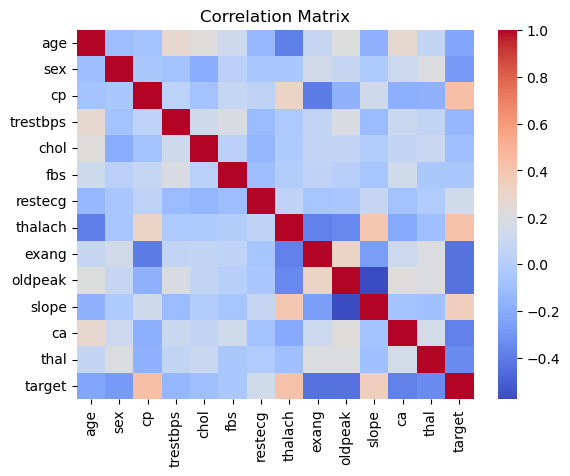

In [39]:
# Create a correlation matrix using pandas
corr_matrix = patient_data.corr()
# Create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')
# Add labels to the plot
plt.title('Correlation Matrix')
# Show the plot
plt.show()

In [40]:
patient_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
patient_data.duplicated().sum()

723

In [42]:
patient_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<a id="section-one"></a>
<div style="padding:15px;color:white;
            margin:0;font-size:300%;
            text-align:left;display:fill;
            border-radius:0px;background-color:#1167b1;
            overflow:hidden;font-weight:600;
            font-family: Trebuchet MS">Data Preprocessing </div>

In [44]:
X_normal = patient_data.drop("target", axis=1)
Y = patient_data['target']

In [45]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [46]:
Y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<a id="section-four"></a>
<div style="padding:15px;color:white;
            margin:0;font-size:300%;
            text-align:left;display:fill;
            border-radius:0px;background-color:#1167b1;
            overflow:hidden;font-weight:600;
            font-family: Trebuchet MS">Model Training and Evaluation </div>

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 1- Logistic Regression </div>

Accuracy of Logistic Regression: 79.51219512195122 %


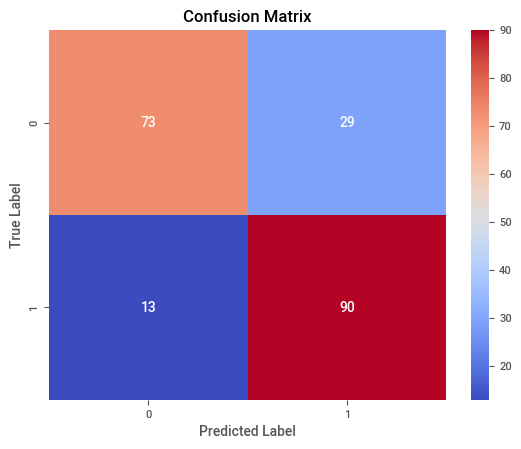

In [51]:
#model_1 = "Logistic Regression"
LR = LogisticRegression()
model = LR.fit(X_train, Y_train)
LR_predict = LR.predict(X_test)
LR_acc_score = accuracy_score(Y_test, LR_predict)
print("Accuracy of Logistic Regression:",LR_acc_score*100,'%')

# Generate the confusion matrix
LR_cm = confusion_matrix(Y_test, LR_predict)

# Create a heatmap using seaborn
sns.heatmap(LR_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 2- Decision Tree Classifier </div>

Accuracy of DecisionTreeClassifier: 79.02439024390245


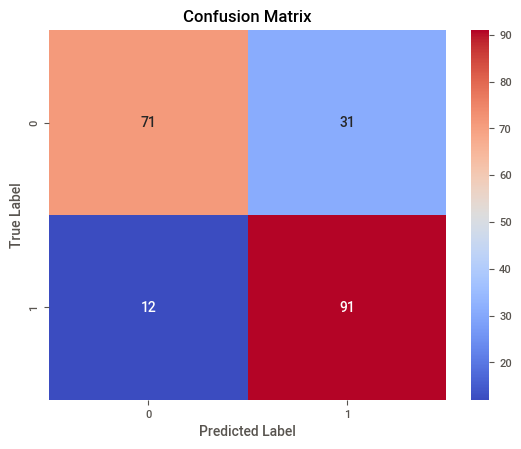

In [53]:
#model_2 = "Decision Tree Classifier"
DT = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4)
model = DT.fit(X_train, Y_train)
DT_predict = DT.predict(X_test)


DT_acc_score = accuracy_score(Y_test, DT_predict)
print("Accuracy of DecisionTreeClassifier:",DT_acc_score*100)

# Generate the confusion matrix
DT_cm = confusion_matrix(Y_test, DT_predict)

# Create a heatmap using seaborn
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 3- Random Forest Classfier </div>

Accuracy of Random Forest: 88.29268292682927


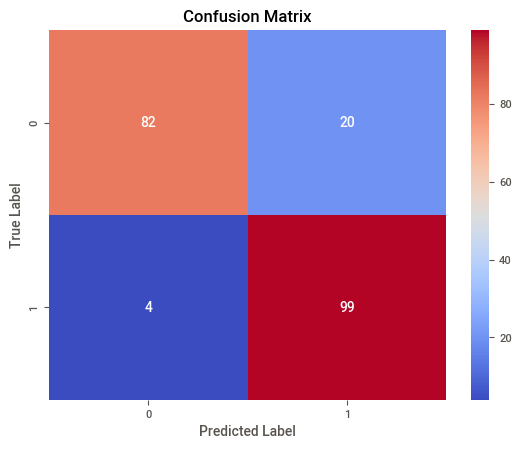

In [55]:
#model_3 = "Random Forest Classfier"
RF = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
RF.fit(X_train,Y_train)
RF_predict = RF.predict(X_test)
RF_acc_score = accuracy_score(Y_test, RF_predict)
print("Accuracy of Random Forest:",RF_acc_score*100)

# Generate the confusion matrix
RF_cm = confusion_matrix(Y_test, RF_predict)

# Create a heatmap using seaborn
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 4- K-Neighbors Classifier </div>

Accuracy of K-NeighborsClassifier: 83.90243902439025 



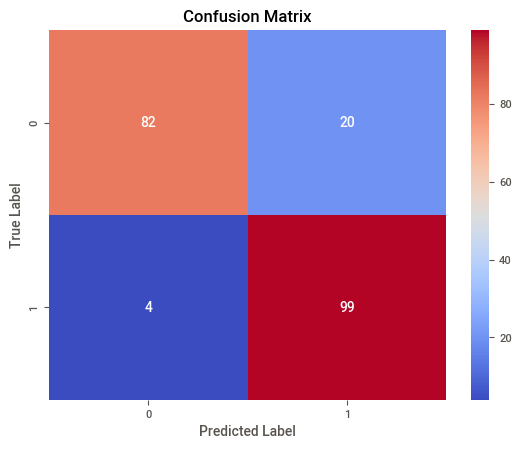

In [57]:
#model_4 = "K-NeighborsClassifier"
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, Y_train)
KNN_predict = KNN.predict(X_test)
KNN_acc_score = accuracy_score(Y_test, KNN_predict)
print("Accuracy of K-NeighborsClassifier:",KNN_acc_score*100,'\n')

# Generate the confusion matrix
RF_cm = confusion_matrix(Y_test, RF_predict)

# Create a heatmap using seaborn
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 5- Support Vector Classifier </div>

Accuracy of Support Vector Classifier: 92.19512195121952


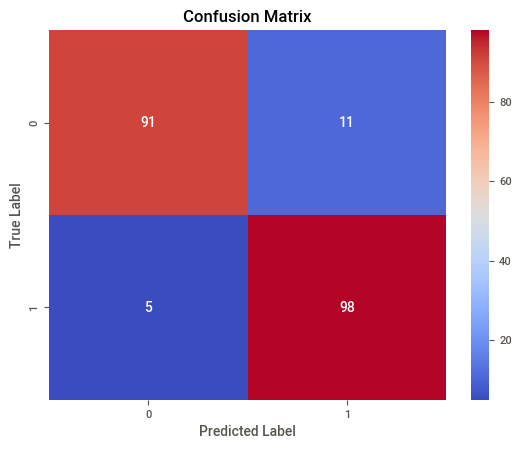

In [59]:
#model_5 = "Support Vector Classifier"
SVM = SVC(kernel='rbf', C=2)
SVM.fit(X_train, Y_train)
SVM_predict = SVM.predict(X_test)
SVM_acc_score = accuracy_score(Y_test, SVM_predict)
print("Accuracy of Support Vector Classifier:",SVM_acc_score*100)

# Generate the confusion matrix
SVM_cm = confusion_matrix(Y_test, SVM_predict)

# Create a heatmap using seaborn
sns.heatmap(SVM_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:400; font-family: Trebuchet MS"> 6- Naive Bayes Classifier </div>

Accuracy of Naive Bayes model: 80.0


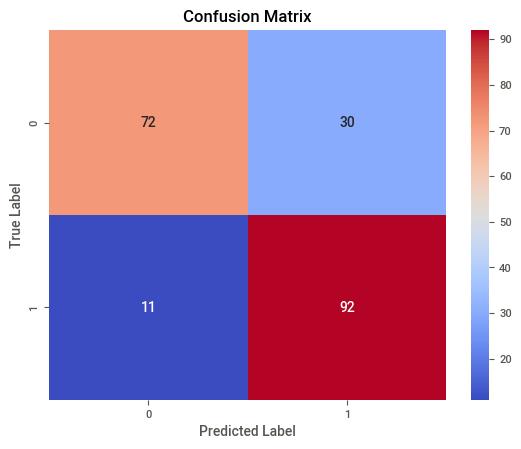

In [61]:
#model_6 = "Naive Bayes"
NB = GaussianNB()
NB.fit(X_train,Y_train)
NB_predict = NB.predict(X_test)
NB_acc_score = accuracy_score(Y_test, NB_predict)
print("Accuracy of Naive Bayes model:",NB_acc_score*100)

# Generate the confusion matrix
NB_cm = confusion_matrix(Y_test, NB_predict)

# Create a heatmap using seaborn
sns.heatmap(NB_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [105]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbour', 
                                     'Support Vector Machine', 'Gaussian Naive Bayes'], 
                        'Accuracy': [LR_acc_score*100, DT_acc_score*100, RF_acc_score*100, KNN_acc_score*100, SVM_acc_score*100,
                                     NB_acc_score*100]})

max_accuracy = comparison['Accuracy'].max()

styled_compare = comparison.style.applymap(lambda x: 'background-color: lightgreen' if x == max_accuracy else '', subset=['Accuracy'])
styled_compare.set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')

Model,Accuracy
Logistic Regression,79.512195
Decision Tree,79.024390
Random Forest,88.292683
K-Nearest Neighbour,83.902439
Support Vector Machine,92.195122
Gaussian Naive Bayes,80.000000


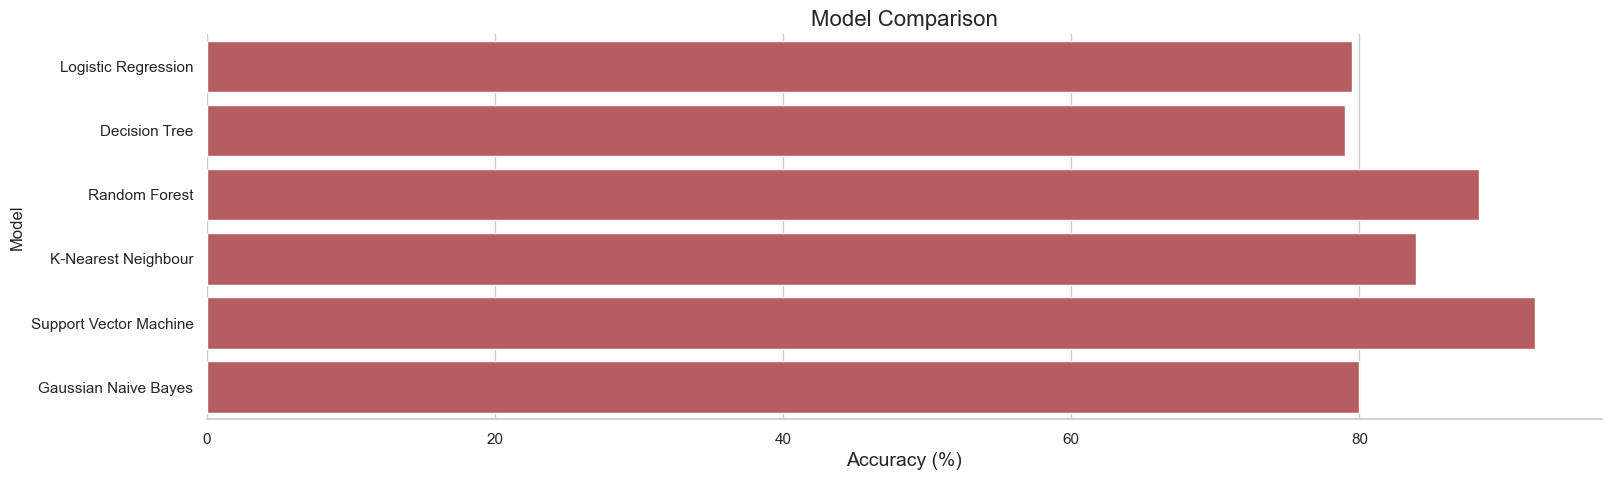

In [128]:
# Create a bar plot with seaborn
plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
ax = sns.barplot(x='Accuracy', y='Model', data=comparison, color='r')

# Add horizontal grid lines
sns.despine(left=True)

# Add labels to the plot
plt.title('Model Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)

# Show the plot
plt.show()

<div style="padding:10px;color:black;
            margin:0;font-size:120%;
            text-align:justify;display:fill;
            border-radius:0px;background-color:#f2f2f2;
            overflow:hidden; font-weight:600; font-family: Trebuchet MS"> <b>The best Model : Support Vector Machine</b>